In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unicodedata import category


In [4]:
sns.set_theme(style="white")

In [5]:
project_dir = r"D:\Pycharm_Projects\xgboost_loan_data"
data_dir = os.path.join(project_dir,'data')

In [6]:
df = pd.read_csv(os.path.join(data_dir,'loan_data.csv'))

In [7]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## Variable description

[Kaggle Data Source](https://www.kaggle.com/datasets/udaymalviya/bank-loan-data)

### Personal Information
| Variable        | Description           |
| ------------- |-------------|
|person_age| Age of the applicant (in years).|
|person_gender| Gender of the applicant (male, female).|
|person_education| Educational background (High School, Bachelor, Master, etc.).|
|person_income| Annual income of the applicant (in USD).|
|person_emp_exp| Years of employment experience.|
|person_home_ownership| Type of homeownership (RENT, OWN, MORTGAGE).|


### Loan Details
| Variable        | Description           |
| ------------- |-------------|
|loan_amnt| Loan amount requested (in USD).|
|loan_intent| Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, etc.).|
|loan_int_rate| Interest rate on the loan (percentage).|
|loan_percent_income| Ratio of loan amount to income.|


### Credit & Loan History
| Variable        | Description           |
| ------------- |-------------|
|cb_person_cred_hist_length| Length of the applicant's credit history (in years).|
|credit_score| Credit score of the applicant.|
|previous_loan_defaults_on_file| Whether the applicant has previous loan defaults (Yes or No).|

### Target Variable
| Variable        | Description           |
| ------------- |-------------|
|loan_status| 1 if the loan was repaid successfully, 0 if the applicant defaulted.|


In [8]:
# convert string columns to category type
for col in df.select_dtypes(exclude=np.number).columns.tolist():
    df[col] = df[col].astype('category')

## Plot the correlation matrix
Calculate the correlation matrix of numeric variables and visualize the matrix.
_Will omit the upper right triangle_

The aim is to see if there are any varaibles that are strongly correlated (positive or negative) to the **loan_status** variable

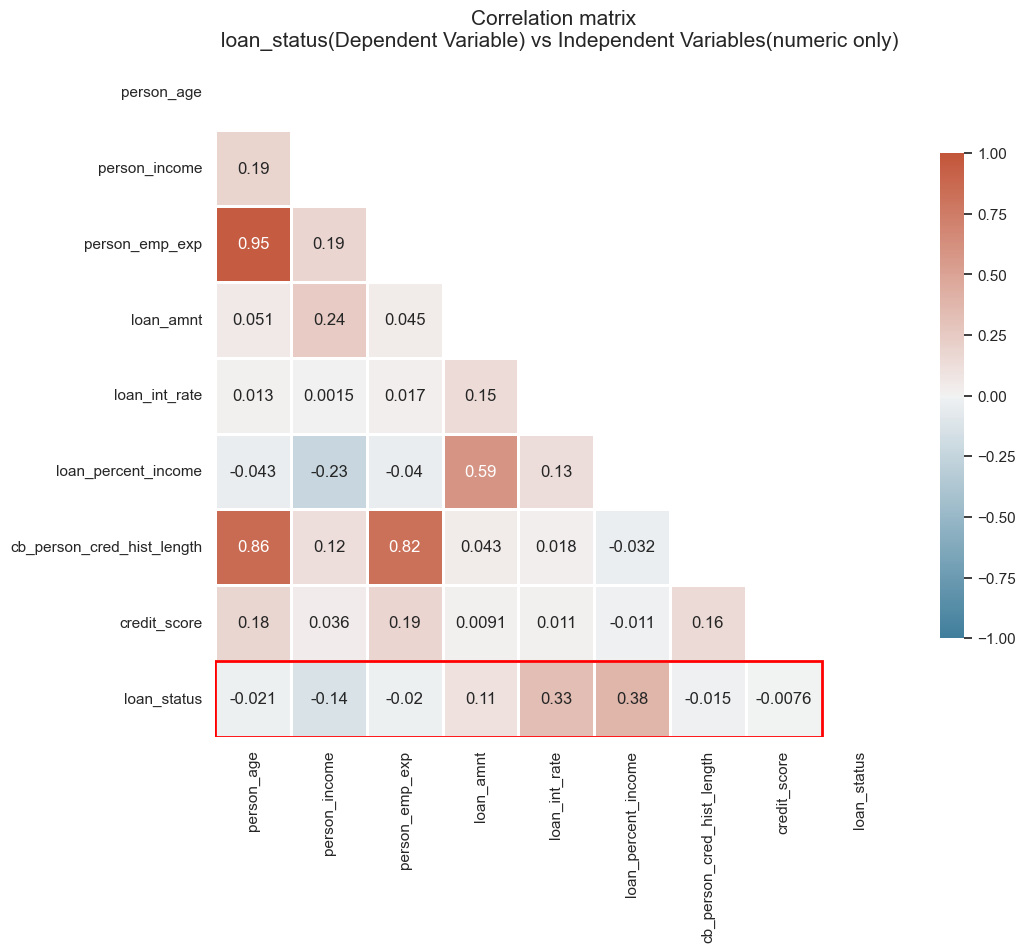

In [32]:

corr_matrix = df.loc[:,df.select_dtypes(include=np.number).columns].corr()
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap,vmax=1,vmin=-1,
            center=0,square=True,linewidths=0.75,linecolor='white',
            cbar_kws={'shrink':0.7},annot=True)

ax.add_patch(
    plt.Rectangle((0,9),width=8,height=-1,
                  rotation_point='xy',
                  edgecolor='red',lw=2,fill=False)
)
plt.title('Correlation matrix \n loan_status(Dependent Variable) vs Independent Variables(numeric only)',fontdict={'size':15})
plt.show()
